In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [377]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.1, 0.9]
)

In [545]:
IMAGE_SIZE = 150
batch_size = 36
train_generator = train_datagen.flow_from_directory(
    'C:/Users/Rana Wael/Documents/Slash/data/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True, 
    seed=42
)

Found 188 images belonging to 5 classes.


In [519]:
validation_generator = train_datagen.flow_from_directory(
    'C:/Users/Rana Wael/Documents/Slash/data/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 188 images belonging to 5 classes.


In [520]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory('C:/Users/Rana Wael/Documents/Slash/data/test', 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6 images belonging to 5 classes.


In [541]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(156))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [547]:
fitting = model.fit(train_generator, steps_per_epoch=200//batch_size, validation_data=validation_generator, validation_steps=800//batch_size, epochs=30, verbose=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.3042 - loss: 0.5093 - val_accuracy: 0.2872 - val_loss: 0.4219
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.3750 - loss: 0.2950 - val_accuracy: 0.2872 - val_loss: 0.4263
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.2835 - loss: 0.5031 - val_accuracy: 0.2872 - val_loss: 0.4261
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.2222 - loss: 0.3021 - val_accuracy: 0.2872 - val_loss: 0.4343
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.2606 - loss: 0.5073 - val_accuracy: 0.2872 - val_loss: 0.4191
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.2500 - loss: 0.3422 - val_accuracy: 0.2766 - val_loss: 0.4439
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.2923 - loss: 0.5150 - val_accuracy: 0.3085 - val_loss: 0.4155
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.2778 - loss: 0.2979 - val_accuracy: 0.2926 - val_loss: 0.4167
Epoch 9/

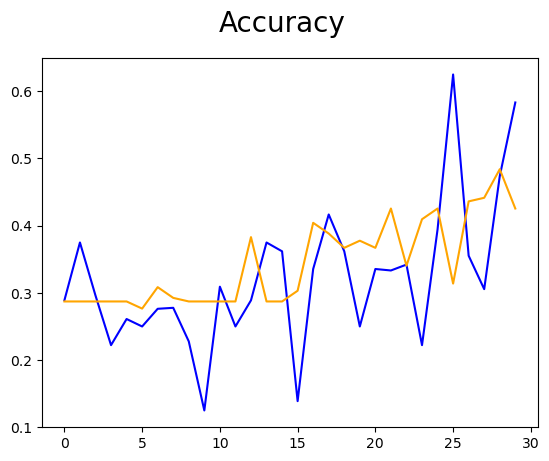

In [548]:
fig = plt.figure()
plt.plot(fitting.history['accuracy'], color ='blue', label = 'accuracy')
plt.plot(fitting.history['val_accuracy'], color ='orange', label = 'val_accuracy')
plt.suptitle('Accuracy', fontsize=20)

plt.show()


In [552]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model (excluding the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(CLASSES, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(train_generator, epochs=15, batch_size=36, validation_data=validation_generator)

# Unfreeze the top layers of the base model for fine-tuning
base_model.trainable = True
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

model.fit(train_generator, validation_data=validation_generator, epochs=15, batch_size=36)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 95s 13s/step - accuracy: 0.2271 - loss: 2.0562 - val_accuracy: 0.2128 - val_loss: 1.5455
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.3387 - loss: 1.5633 - val_accuracy: 0.1968 - val_loss: 1.5277
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 63s 9s/step - accuracy: 0.2367 - loss: 1.5476 - val_accuracy: 0.3777 - val_loss: 1.4574
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 68s 10s/step - accuracy: 0.3820 - loss: 1.4867 - val_accuracy: 0.5585 - val_loss: 1.3953
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 64s 9s/step - accuracy: 0.4548 - loss: 1.4351 - val_accuracy: 0.5000 - val_loss: 1.2553
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 67s 10s/step - accuracy: 0.3795 - loss: 1.4369 - val_accuracy: 0.4628 - val_loss: 1.2615
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 66s 9s/step - accuracy: 0.3656 - loss: 1.4430 - val_accuracy: 0.5000 - val_loss: 1.2301
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 65s 9s/step - accuracy: 0.4210 - loss: 1.3462 - val_accuracy: 0.5851 - val_loss: 1.1053
Epoc

AttributeError: 'Figure' object has no attribute 'title'

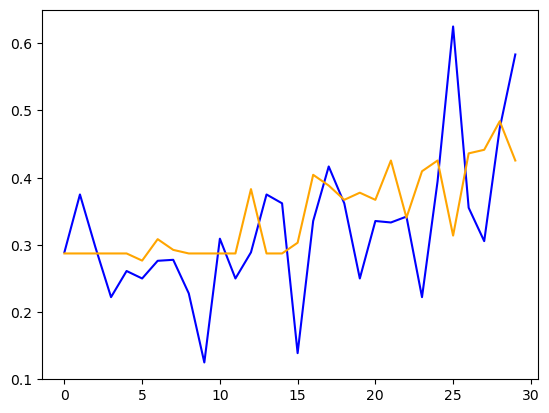

In [553]:
fig = plt.figure()
plt.plot(fitting.history['accuracy'], color ='blue', label = 'accuracy')
plt.plot(fitting.history['val_accuracy'], color ='orange', label = 'val_accuracy')
fig.title('Accuracy', fontsize=20)
plt.show()


In [554]:
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8333 - loss: 0.7189
Test Loss: 0.7189229130744934
Test Accuracy: 0.8333333134651184
